<a href="https://colab.research.google.com/github/PranayUmredkar97/Demand-Predicition-for-Public-Transport/blob/main/Demand_Prediction_for_Public_Transport_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

# **Import Packages**

In [1]:
#import required packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.graph_objects as go
# import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#set style for graph
sns.set_style(style='darkgrid')

# Setting fontsizes,fontweight,label weight for labels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

# **Data Preperation**

## **Mounting Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
#csv file location
path = '/content/drive/MyDrive/Demand Prediction for Public Transport - Pranay Umredkar/train_revised.csv'

## **Reading data in notebook**

In [5]:
df = pd.read_csv(path)

## **Data Inspection**

In [6]:
#first look checking top 5 rows
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [7]:
df.tail()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


In [8]:
#check information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ride_id,51645.0,NaN,NaN,NaN,10188.645793,2211.295708,1442.0,8287.0,10353.0,12029.0,20117.0
seat_number,51645,61,1,2065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_method,51645,2,Mpesa,51532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_receipt,51645,51645,UZUEHCBUSO,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
travel_date,51645,149,10-12-17,856,NaN,NaN,NaN,NaN,NaN,NaN,NaN
travel_time,51645,78,7:09,3926,NaN,NaN,NaN,NaN,NaN,NaN,NaN
travel_from,51645,17,Kisii,22607,NaN,NaN,NaN,NaN,NaN,NaN,NaN
travel_to,51645,1,Nairobi,51645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_type,51645,2,Bus,31985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max_capacity,51645.0,NaN,NaN,NaN,34.534321,18.451193,11.0,11.0,49.0,49.0,49.0


## Inference


*   There are 61 unique seat numbers in this dataset.
*   There are two payment method used by travellers and most of them used Mpesa for payment.
* We have data for 149 days in our dataset.
* There are two different types of car used for travelling and mostly bus having max capcity of 49 and other is shuttle having max capacity of 11.


In [10]:
#check columns names
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [11]:
#first create copy of dataset before working with so that we have original data untouched
df1 = df.copy()

## **Check columns and their unique values to understand what they contain.**

In [12]:
#check unique values for categorical columnns
categorical_columns = df1.select_dtypes(include=['object'])
for col in categorical_columns:
  print(f'Unique values in categorical columns {col} are: {categorical_columns[col].unique()[:8]}\n')

Unique values in categorical columns seat_number are: ['15A' '14A' '8B' '19A' '11A' '18B' '25' '21B']

Unique values in categorical columns payment_method are: ['Mpesa' 'Cash']

Unique values in categorical columns payment_receipt are: ['UZUEHCBUSO' 'TIHLBUSGTE' 'EQX8Q5G19O' 'SGP18CL0ME' 'BM97HFRGL9'
 'B6PBDU30IZ' 'MZHGDGS6QZ' 'MYVTYFNXDZ']

Unique values in categorical columns travel_date are: ['17-10-17' '19-11-17' '26-11-17' '27-11-17' '20-04-18' '19-04-18'
 '18-04-18' '17-04-18']

Unique values in categorical columns travel_time are: ['7:15' '7:12' '7:05' '7:10' '7:09' '5:10' '9:50' '7:06']

Unique values in categorical columns travel_from are: ['Migori' 'Keroka' 'Homa Bay' 'Kisii' 'Keumbu' 'Rongo' 'Kijauri' 'Oyugis']

Unique values in categorical columns travel_to are: ['Nairobi']

Unique values in categorical columns car_type are: ['Bus' 'shuttle']



In [13]:
#check unique values for numerical columns
numerical_columns = df1._get_numeric_data()
for col in numerical_columns:
  print(f'Unique values in numerical columns {col} are: {numerical_columns[col].unique()[:8]}\n')

Unique values in numerical columns ride_id are: [1442 5437 5710 5777 5778 5781 5784 5789]

Unique values in numerical columns max_capacity are: [49 11]



In [14]:
#check count of unqiue ride_id
len(df1['ride_id'].unique())

6249

## **Handling missing values.**

In [15]:
#check null values
df1.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

As we can see there are no null values in our dataset.

In [16]:
df['ride_id'].value_counts()

8454     50
13211    49
10834    49
8090     49
11382    49
         ..
10090     1
10091     1
10114     1
10116     1
14304     1
Name: ride_id, Length: 6249, dtype: int64

## **Finding Target variable.**
We are not given the target varibale, so we have to find it.
I am using count of ride_id to find our target variable.

In [17]:
labels = df.groupby(['ride_id']).seat_number.count().rename('number_of_tickets').reset_index()
labels

,ride_id,number_of_tickets
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31
...,...,...
6244,20113,9
6245,20114,4
6246,20115,5
6247,20116,1


## **Add target variable into main dataframe.**

In [18]:
#merge two datasets on 'ride_id' columns
df1 = pd.merge(df1, labels, how ='left', on = 'ride_id')

In [19]:
df1

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31
...,...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49,1
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49,29
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49,29
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49,27


In [20]:
#check for duplicate rows
df1.duplicated().value_counts()

False    51645
dtype: int64

As we can see there is no duplicate row in our dataset.

## **Converting some columns to proper dtype and format.**

In [21]:
#concatenate travel date and travel time column and make a new feature called date.
df1["date"]=df1["travel_date"]+ " "+df1["travel_time"]


In [22]:
df1["date"]=pd.to_datetime(df1["date"])
df1["hour"]=df1["date"].dt.hour
df1["minute"]=df1["date"].dt.minute

In [23]:
#as travel_date is in object dtype so we will convert it into datetime
df1['travel_date'] = pd.to_datetime(df['travel_date'],format = '%d-%m-%y')

In [24]:
#first convert travel_time from object to datetime
df1['travelling_time'] = pd.to_datetime(df1['travel_time'])

In [25]:
#now convert travel_time to time format
df1['travelling_time'] = df1['travelling_time'].dt.time

In [26]:
#splitting travel_date column into day,month and year

def split_date(df1):
  '''This function takes dataframe as an argument and extract the different date features of the date variable and return updated dataset'''
  df1['day_of_month'] = df1['travel_date'].dt.day
  df1['month'] = df1['travel_date'].dt.month
  df1['year'] = df1['travel_date'].dt.year
  df1['day_of_week'] = df1['travel_date'].dt.day_of_week
  df1['is_weekend'] = df1['day_of_week'].apply(lambda x : 1 if x in[5,6] else 0)
  return df1

In [27]:
df1 = split_date(df1)

In [28]:
df1.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets,date,hour,minute,travelling_time,day_of_month,month,year,day_of_week,is_weekend
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,1,2017-10-17 07:15:00,7,15,07:15:00,17,10,2017,1,0
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,1,2017-11-19 07:12:00,7,12,07:12:00,19,11,2017,6,1
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,1,2017-11-26 07:05:00,7,5,07:05:00,26,11,2017,6,1
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,5,2017-11-27 07:10:00,7,10,07:10:00,27,11,2017,0,0
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,31,2017-11-27 07:12:00,7,12,07:12:00,27,11,2017,0,0


In [29]:
df1['month'].value_counts()

12    12768
2     12315
3     10876
1      7830
4      6924
11      931
10        1
Name: month, dtype: int64

## **EDA**

In [30]:
#checking from which place people travel most
df1['travel_from'].value_counts()

Kisii        22607
Migori        7027
Homa Bay      6304
Sirare        4449
Rongo         3928
Kehancha      1909
Awendo        1788
Kijauri       1031
Keroka         988
Nyachenge      512
Rodi           405
Mbita          378
Ndhiwa         236
Sori            55
Keumbu          22
Oyugis           5
Kendu Bay        1
Name: travel_from, dtype: int64

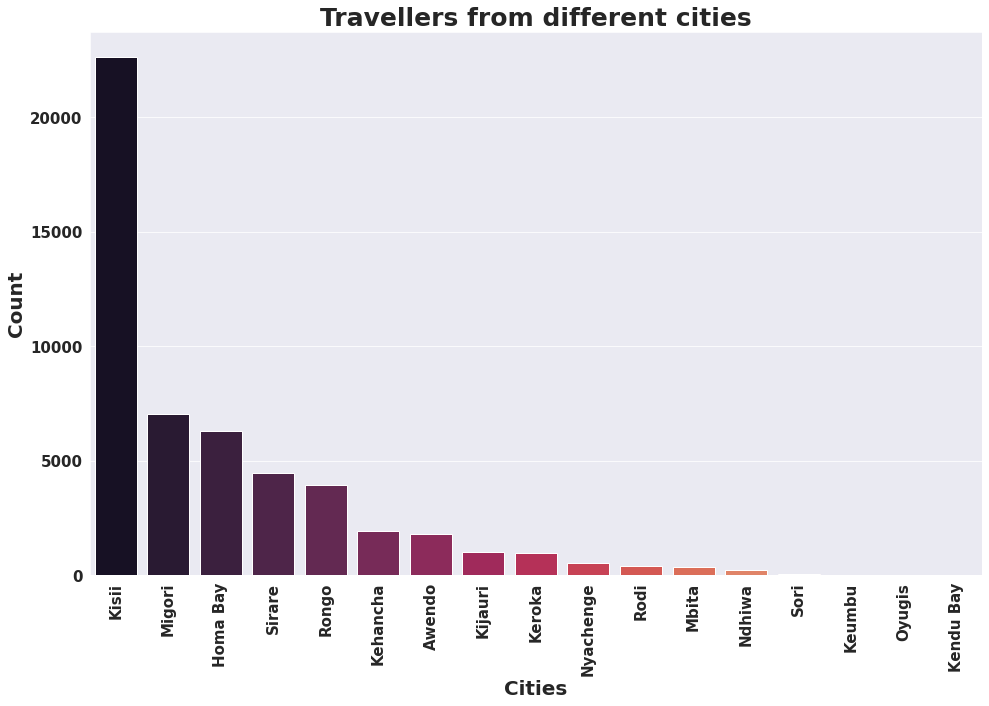

In [31]:
plt.figure(figsize=(16,10))
sns.countplot(x=df1['travel_from'],palette='rocket',order=df1['travel_from'].value_counts().index)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Travellers from different cities');

## Inference


*   Most numbers of travellers are from kissi city followed by Migori and Homa Bay.



In [32]:
#Car type and payment methods used
cols = ['car_type','payment_method']
print(df1[cols].value_counts())

car_type  payment_method
Bus       Mpesa             31941
shuttle   Mpesa             19591
          Cash                 69
Bus       Cash                 44
dtype: int64


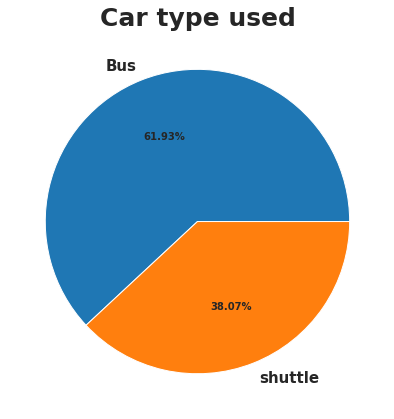

In [33]:

plt.figure(figsize=(7,7))
plt.pie(df1['car_type'].value_counts(),labels = df['car_type'].value_counts().keys(),autopct = '%0.2f%%')
plt.title('Car type used');


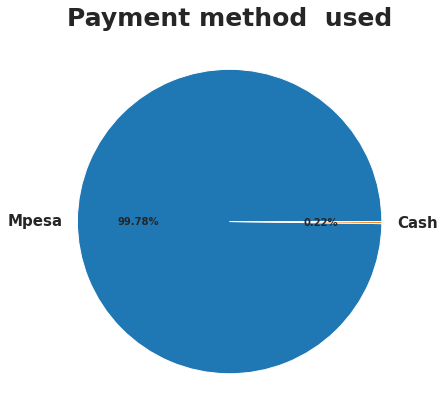

In [34]:
plt.figure(figsize=(7,7))
plt.pie(df1['payment_method'].value_counts(),labels = df['payment_method'].value_counts().keys(),autopct = '%0.2f%%')
plt.title('Payment method  used');

## Inference
* Out of two options for travelling most preferred is Bus 61.93%.
* People used Mpesa payment method 99.78% of the times.

In [35]:
df1['month'].value_counts()

12    12768
2     12315
3     10876
1      7830
4      6924
11      931
10        1
Name: month, dtype: int64

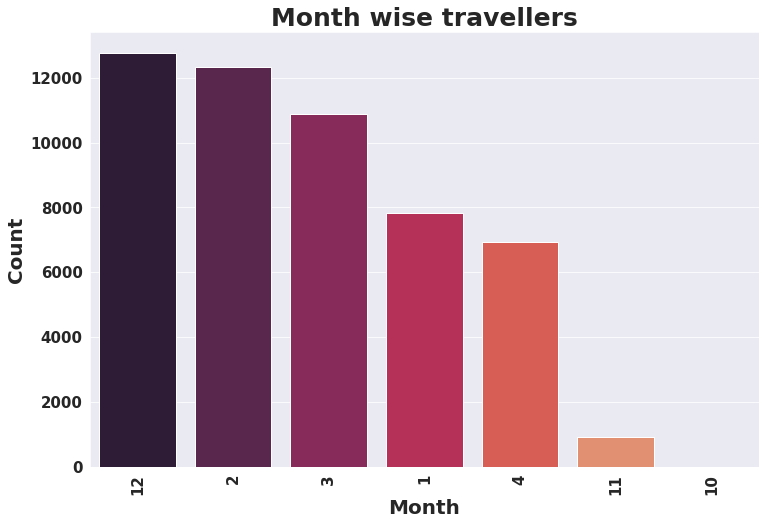

In [36]:
#cheking for month wise travels
plt.figure(figsize=(12,8))
sns.countplot(x=df1['month'],palette='rocket',order=df1['month'].value_counts().index)
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Month wise travellers');

## Inference

* People prefer to travel in summer season mostly in december to march and april.

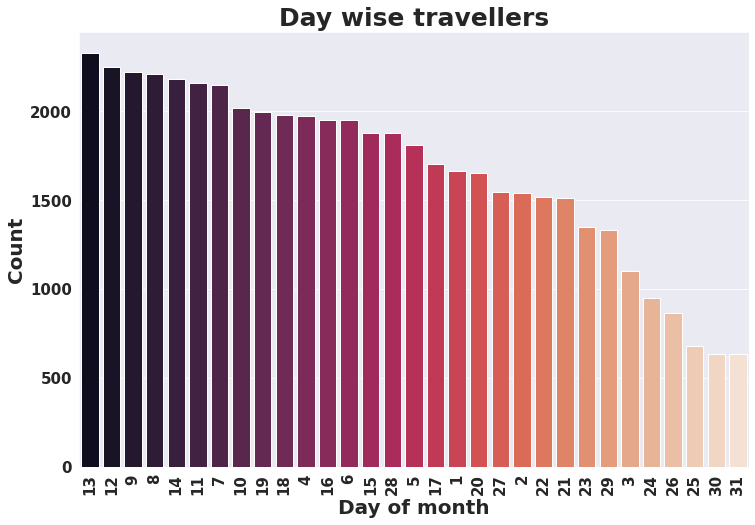

In [37]:
#cheking for month wise travels
plt.figure(figsize=(12,8))
sns.countplot(x=df1['day_of_month'],palette='rocket',order=df1['day_of_month'].value_counts().index)
plt.xlabel('Day of month')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Day wise travellers');

## Inference

* There is no such huge difference in day wise travel still people most 
travells in start and middle of month.

In [38]:
df1['year'].value_counts()

2018    37945
2017    13700
Name: year, dtype: int64

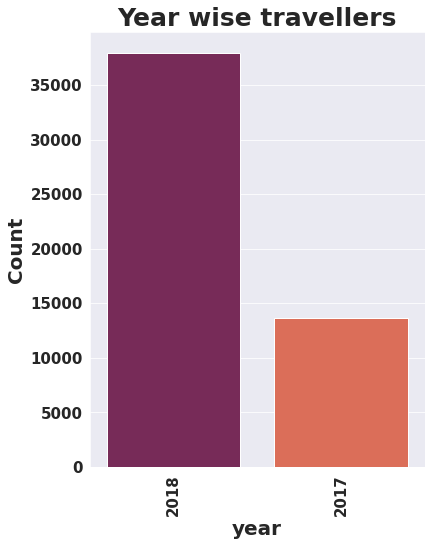

In [39]:
#Checking which year has the highest travellers
plt.figure(figsize=(6,8))
sns.countplot(x=df1['year'],palette='rocket',order=df1['year'].value_counts().index)
plt.xlabel('year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Year wise travellers');

## Inference
* Year 2018 has the highest number of traveller almost triple than year 2017, there is no effect as it is because of data we have less data for travelling in year 2017.

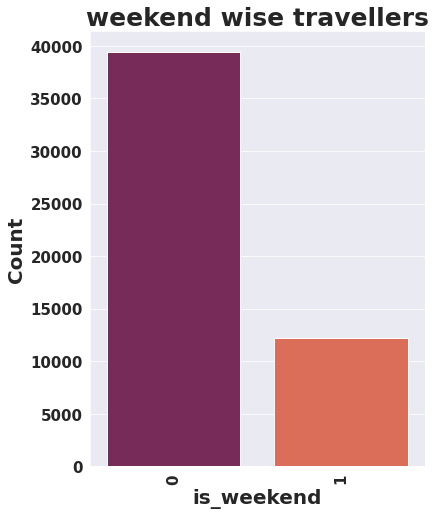

In [40]:
#Checking weekend travellers
plt.figure(figsize=(6,8))
sns.countplot(x=df1['is_weekend'],palette='rocket',order=df1['is_weekend'].value_counts().index)
plt.xlabel('is_weekend')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('weekend wise travellers');

## Inference
* weekdays has more traveller than weekends, it is obvious as weekdays are more than weekends.

In [41]:
#number of tickets booked by traveller from different cities for car type
group_by_car_travel_from = df1.groupby(['car_type','travel_from'])['number_of_tickets'].count().reset_index()

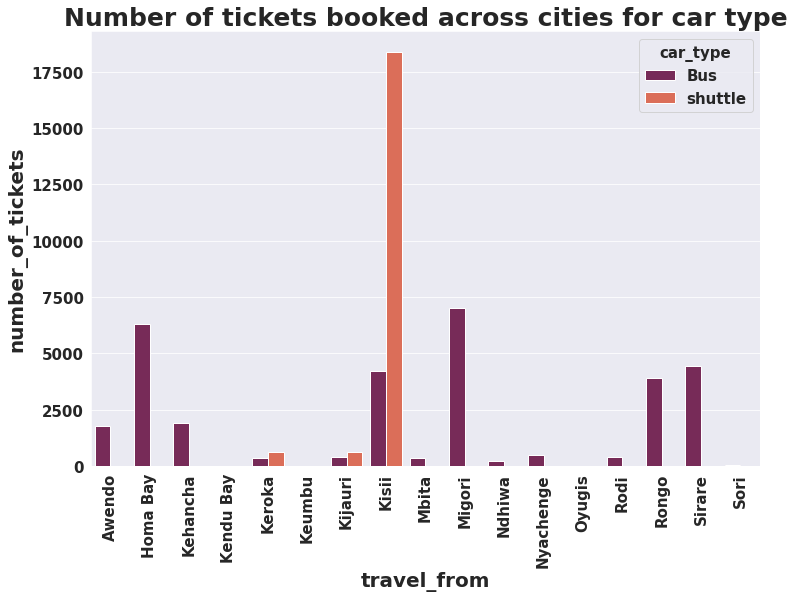

In [42]:
plt.figure(figsize=(12,8))
sns.barplot(x='travel_from', y='number_of_tickets', data=group_by_car_travel_from,  hue='car_type',palette='rocket')
plt.xticks(rotation=90)
plt.title('Number of tickets booked across cities for car type');

* mostly people booked bus for travelling.
* from kissi city people has booked more shuttle for travelling.

In [43]:
#at what time people use public transport most
grp_by_time = df1.groupby(['travel_time'])['number_of_tickets'].count().sort_values(ascending=False).reset_index()[:20]
grp_by_time

,travel_time,number_of_tickets
0,7:09,3926
1,7:04,3837
2,7:12,3540
3,19:07,3227
4,7:08,2989
5,7:15,2146
6,7:13,1724
7,7:05,1675
8,7:06,1661
9,7:00,1603


* Mostly people used public transport at morning between 7:00 Am to 8:00 Am.

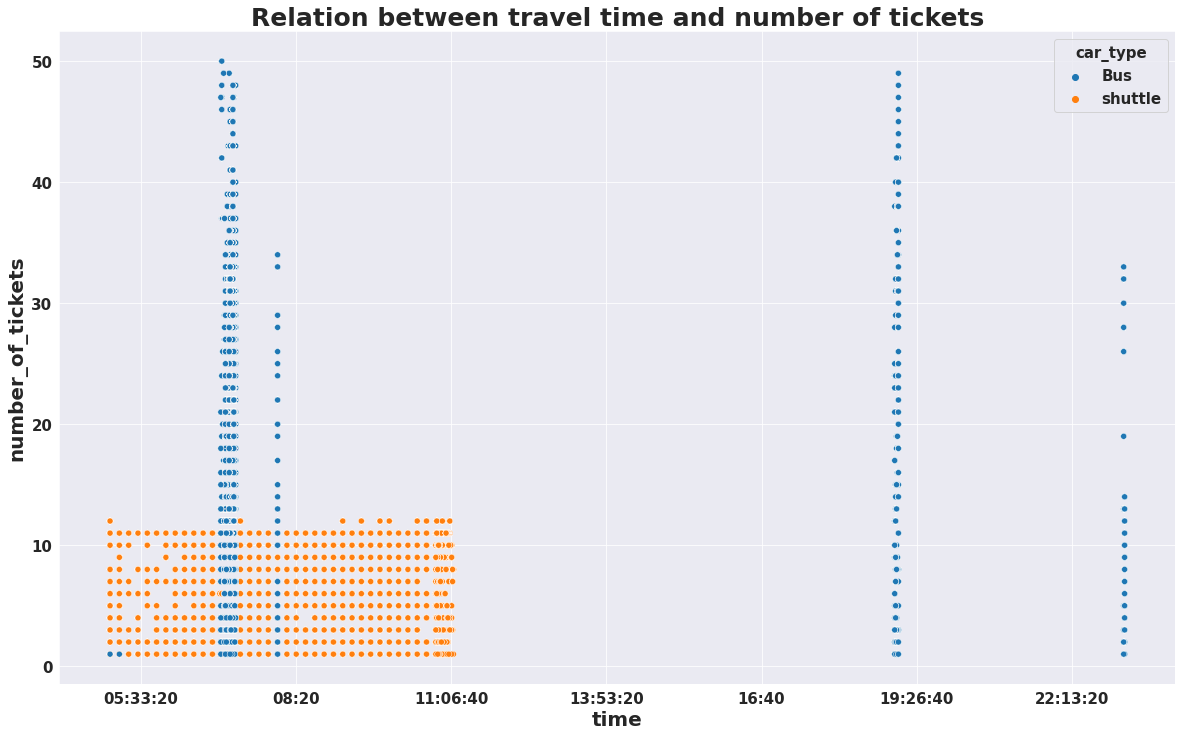

In [44]:
#scatter plot to know relation between travel time and number of tickets
plt.figure(figsize=(20,12))
sns.scatterplot(x=df1['travelling_time'],y=df1['number_of_tickets'],hue=df1['car_type'])
plt.title('Relation between travel time and number of tickets');

* There is no such obvious relation between between number of tickets booked over time mostly tickets booked at the time of morning and evening.

In [45]:
df1['day_of_week'] = df1['travel_date'].dt.day_name()

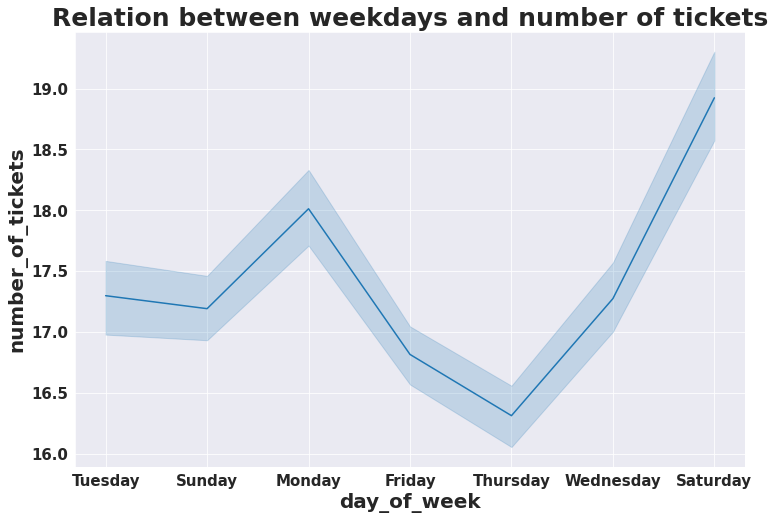

In [46]:
#checking weekdays and number of tickets relation
plt.figure(figsize=(12,8))
sns.lineplot(x=df1['day_of_week'],y=df1['number_of_tickets'])
plt.title('Relation between weekdays and number of tickets');


* At start of week number of bookings are high and reduced in middle of week and highest at saturday as it is weekend.

## **Feature Engineering**

In [47]:
df1['travel_time'] = df1['travel_time'].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60)

In [48]:
df1['travel_time']

0        7.250000
1        7.200000
2        7.083333
3        7.166667
4        7.200000
           ...   
51640    8.000000
51641    8.000000
51642    8.000000
51643    7.133333
51644    5.166667
Name: travel_time, Length: 51645, dtype: float64

In [49]:
#Creating slots of time to distribute whole day in 5 slots
df1['time_slot'] = np.nan
df1.loc[df1.travel_time<7,'time_slot'] = 'early_morning'
df1.loc[(df1.travel_time >= 7) & (df1.travel_time < 11), 'time_slot'] = '7_11am'
df1.loc[(df1.travel_time >= 11) & (df1.travel_time < 15), 'time_slot'] = '11am_15pm'
df1.loc[(df1.travel_time >= 15) & (df1.travel_time < 19), 'time_slot'] = '15pm_19pm'
df1.loc[(df1.travel_time >= 19) & (df1.travel_time <= 24), 'time_slot'] = '19pm_24pm'

In [50]:
df1['day_of_month'].unique()

array([17, 19, 26, 27, 20, 18, 16, 15, 14, 13, 12, 11, 28, 10,  9,  8,  7,
        6,  5,  4,  3,  2,  1, 31, 30, 29, 25, 24, 23, 22, 21])

In [51]:
#Now let't convert day of month into three category like day1-10 is 1 and so on 
day_conv_dic = {1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1,10:1,11:2,12:2,13:2,14:2,15:2,16:2,17:2,18:2,19:2,20:2,21:3,22:3,23:3,24:3,25:3,26:3,27:3,28:3,29:3,30:3,31:3}
df1['day_of_month'].replace(day_conv_dic,inplace=True)

In [52]:
df1.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,...,date,hour,minute,travelling_time,day_of_month,month,year,day_of_week,is_weekend,time_slot
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7.250000,Migori,Nairobi,Bus,49,...,2017-10-17 07:15:00,7,15,07:15:00,2,10,2017,Tuesday,0,7_11am
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7.200000,Migori,Nairobi,Bus,49,...,2017-11-19 07:12:00,7,12,07:12:00,2,11,2017,Sunday,1,7_11am
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7.083333,Keroka,Nairobi,Bus,49,...,2017-11-26 07:05:00,7,5,07:05:00,3,11,2017,Sunday,1,7_11am
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7.166667,Homa Bay,Nairobi,Bus,49,...,2017-11-27 07:10:00,7,10,07:10:00,3,11,2017,Monday,0,7_11am
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7.200000,Migori,Nairobi,Bus,49,...,2017-11-27 07:12:00,7,12,07:12:00,3,11,2017,Monday,0,7_11am


## **Encoding Categorical features**

In [53]:
#one hot encoding
df1 = pd.get_dummies(df1,columns=['travel_from','day_of_month','month','day_of_week','time_slot'])

In [54]:
#label encoding
label_enc = {'Bus':1,'shuttle':0}
df1.replace(label_enc,inplace=True)

In [55]:
df1.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_to', 'car_type', 'max_capacity',
       'number_of_tickets', 'date', 'hour', 'minute', 'travelling_time',
       'year', 'is_weekend', 'travel_from_Awendo', 'travel_from_Homa Bay',
       'travel_from_Kehancha', 'travel_from_Kendu Bay', 'travel_from_Keroka',
       'travel_from_Keumbu', 'travel_from_Kijauri', 'travel_from_Kisii',
       'travel_from_Mbita', 'travel_from_Migori', 'travel_from_Ndhiwa',
       'travel_from_Nyachenge', 'travel_from_Oyugis', 'travel_from_Rodi',
       'travel_from_Rongo', 'travel_from_Sirare', 'travel_from_Sori',
       'day_of_month_1', 'day_of_month_2', 'day_of_month_3', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_10', 'month_11', 'month_12',
       'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday', 'time_

In [56]:
#dropping columns which are not using to train model
not_used_columns = ['ride_id','seat_number','payment_method','date','travelling_time','payment_receipt','travel_date','travel_time','travel_to','year','max_capacity']
df1 = df1.drop(not_used_columns,axis =1)

## **Training the models**

In [57]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [58]:
features = df1.drop('number_of_tickets',axis=1)

In [59]:
len(features)

51645

In [60]:
target = df1['number_of_tickets']

In [61]:
len(target)

51645

In [62]:
#splitting data into train tets split
X_train, X_test, y_train, y_test = train_test_split(features,target , test_size = 0.2, random_state = 0) 

In [63]:
print(X_train.shape)
print(X_test.shape)

(41316, 42)
(10329, 42)


## **Training Linear Regression**

In [64]:
#let's train first linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)


LinearRegression()

In [65]:
#checking intercept
lin_reg.intercept_

14.348828354621654

In [66]:
#checking coefficients
lin_reg.coef_

array([  3.53736288,  -0.85619844,  -0.02600198,  -0.49290715,
         4.86050873,  13.13539701,   2.53865494, -10.97961425,
        -2.68251166,  -7.08531308,  -5.82033215,   2.26792292,
        10.15990802,  14.64198061,  -3.59270368,  -8.62806886,
       -11.95445665,  -4.749633  ,  -1.99862198,  19.11977265,
        -9.23288955,   0.31218289,   0.40487801,  -0.71706091,
         3.44698095,   2.53211862,   4.53099936,   4.20499575,
       -22.81452287,   2.40431235,   5.69511584,   0.30667002,
         0.4643381 ,  -1.13032125,   0.6374141 ,  -0.72538983,
         0.16266583,   0.28462304,  -2.73982726,  13.57167225,
        -2.89777402,  -7.93407097])

In [67]:
#prediction on test data
y_pred = lin_reg.predict(X_test)

In [68]:
#prediction on train data
y_train_pred = lin_reg.predict(X_train)

In [69]:
#Creating function to print model metrics
def model_metrics(y_actual,y_predicted,X_test):
  '''This function takes train test split and prediction data and prints model metrics'''
  print('MSE :',mean_squared_error(y_actual,y_predicted))
  print("RMSE :" ,np.sqrt(mean_squared_error(y_actual,y_predicted)))
  r2=r2_score(y_actual, y_predicted)
  print('r2_score :',r2)
  print('Adjusted R2 :',(1-(1-r2_score(y_actual, y_predicted))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))


In [70]:
print(f'Train Score :{lin_reg.score(X_train,y_train)}')
print(f'Test score :{lin_reg.score(X_test,y_test)}')
model_metrics(y_test,y_pred,X_test)

Train Score :0.5971651830638407
Test score :0.5885562232358088
MSE : 63.754649530529235
RMSE : 7.984650870922863
r2_score : 0.5885562232358088
Adjusted R2 : 0.58687620781445


## **Training Lasso Regressor**

In [71]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

print(f'Train Score :{lasso.score(X_train,y_train)}')
print(f'Test score :{lasso.score(X_test,y_test)}')
model_metrics(y_test,y_pred,X_test)

Train Score :0.597158779866807
Test score :0.5885526040857141
MSE : 63.755210330470604
RMSE : 7.984685988219612
r2_score : 0.5885526040857141
Adjusted R2 : 0.5868725738865697


In [72]:
# Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [73]:


print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

y_pred_lasso = lasso_regressor.predict(X_test)

print(f'Train Score :{lasso_regressor.score(X_train,y_train)}')
print(f'Test score :{lasso_regressor.score(X_test,y_test)}')
model_metrics(y_test,y_pred_lasso,X_test)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -61.65106966716729
Train Score :-61.51370871964377
Test score :-63.75485727997452
MSE : 63.75485727997452
RMSE : 7.984663880212775
r2_score : 0.5885548825145122
Adjusted R2 : 0.5868748616186935


## **Training Ridge Regressor**

In [74]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [75]:


print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

y_pred_ridge = ridge_regressor.predict(X_test)

4

The best fit alpha value is found out to be : {'alpha': 1e-10}

Using  {'alpha': 1e-10}  the negative mean squared error is:  -61.66769323717373


4

## **Training Gradient Boosting Regressor**

In [76]:
GBR = GradientBoostingRegressor(random_state=0)
GBR.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [77]:
#prediction
y_pred_GBR = GBR.predict(X_test)

print(f'Train Score :{GBR.score(X_train,y_train)}')
print(f'Test score :{GBR.score(X_test,y_test)}')
model_metrics(y_test,y_pred_GBR,X_test)

Train Score :0.7111376369116932
Test score :0.7036174764960845
MSE : 45.92550666721012
RMSE : 6.776836036618425
r2_score : 0.7036174764960845
Adjusted R2 : 0.7024072814749719


## **Training Random Forest Regressor**

In [78]:
# from sklearn.ensemble import RandomForestRegressor
# Random_Forest_reg =RandomForestRegressor()
# Random_Forest_reg.fit(X_train,y_train)

In [79]:
# y_pred_Random_forest = Random_Forest_reg.predict(X_test)
# print(f'Train Score :{Random_Forest_reg.score(X_train,y_train)}')
# print(f'Test score :{Random_Forest_reg.score(X_test,y_test)}')
# model_metrics(y_test,y_pred_Random_forest,X_test)

## **GridsearchCV on random forest regressor**

In [80]:
# parameters = {'ccp_alpha':[0.01,0.1,1,10,100],
#               'max_depth': [4, 6, 8],
#             'min_samples_leaf': [40, 50],
#             'min_samples_split': [50, 100, 150]  
# }

In [81]:
# Random_Forest_reg = RandomForestRegressor()
# Random_forest_grid =GridSearchCV(Random_Forest_reg,param_grid=parameters, verbose=1,cv=2)
# Random_forest_grid.fit(X_train, y_train)

In [82]:
# Random_forest_grid.best_estimator_.get_params()

In [83]:
# y_pred_Random_forest_grid = Random_forest_grid.predict(X_test)
# print(f'Train Score :{Random_forest_grid.score(X_train,y_train)}')
# print(f'Test score :{Random_forest_grid.score(X_test,y_test)}')
# model_metrics(y_test,y_pred_Random_forest_grid,X_test)

## **Training XGboost**

In [84]:
import xgboost as xgb

XGB_reg = xgb.XGBRegressor()
XGB_reg.fit(X_train,y_train)

[08:10:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [85]:
y_pred_XGB_reg = XGB_reg.predict(X_test)
print(f'Train Score :{XGB_reg.score(X_train,y_train)}')
print(f'Test score :{XGB_reg.score(X_test,y_test)}')
model_metrics(y_test,y_pred_XGB_reg,X_test)

Train Score :0.7118008974400594
Test score :0.7037640716685685
MSE : 45.902791233480436
RMSE : 6.775159867743375
r2_score : 0.7037640716685685
Adjusted R2 : 0.7025544752277829


## **GridsearchCV on XGboost**

In [86]:
params = {'min_child_weight':[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

In [87]:
XGB_reg = xgb.XGBRegressor()
XGB_grid = GridSearchCV(XGB_reg,param_grid=params, verbose=1,cv=3)
XGB_grid.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[08:10:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:11:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:11:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:11:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:11:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:11:25] WARNING: /workspace/src/objective/regre

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
                         'min_child_weight': [10, 20]},
             verbose=1)

In [88]:
XGB_grid.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 11,
 'min_child_weight': 10,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1,
 'eta': 0.004}

In [89]:
XGB_optimal_model =XGB_grid.best_estimator_

In [90]:
y_pred_XGB_reg_grid = XGB_optimal_model.predict(X_test)
print(f'Train Score :{XGB_optimal_model.score(X_train,y_train)}')
print(f'Test score :{XGB_optimal_model.score(X_test,y_test)}')
model_metrics(y_test,y_pred_XGB_reg_grid,X_test)

Train Score :0.939387830056686
Test score :0.9313193244644821
MSE : 10.642310433574723
RMSE : 3.262255421265282
r2_score : 0.9313193244644821
Adjusted R2 : 0.9310388861626648


In [91]:
important_features = XGB_optimal_model.feature_importances_

In [92]:
importance_features_dict = {'Features' : list(X_train.columns),
                   'Feature Importance' : important_features}

In [93]:
important_features_df = pd.DataFrame(importance_features_dict)

In [94]:
important_features=important_features_df.sort_values(by=['Feature Importance'],ascending=False).head(15)

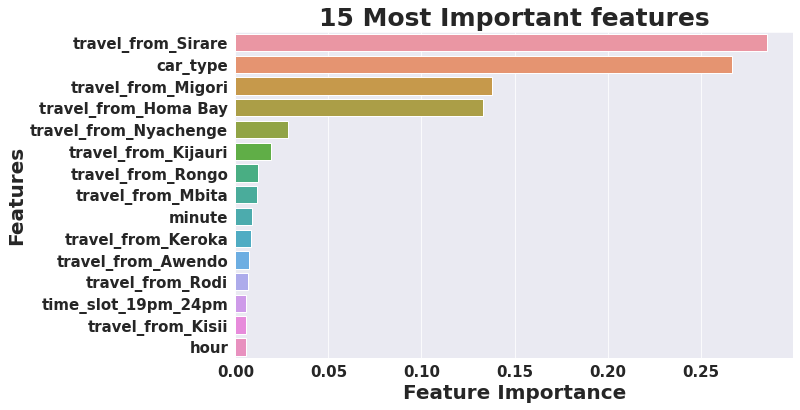

In [95]:
plt.figure(figsize=(10,6))
sns.barplot(y = important_features['Features'], x = important_features['Feature Importance'] )
plt.title('15 Most Important features')
plt.show()

## **Conclusion**

We used different types of regression model to train and test our model like Linear Regression, Regularized Linear Regression(Lasso and Ridge), Gradient Boosting Regressor, XGBoost Regressor. We tuned some parameters and did cross validation to check which model gives best results out of all model XGBoost gave the best results.